In [1]:
# Heatmaps
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('flights.csv')
print(df)

C:\Users\thien\AppData\Local\Temp\ipykernel_9848\547982107.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [3]:
headers = list(df.columns.values)
print(headers)

['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [4]:
# Create a new dataset with only interested columns
delays_df = df[['MONTH', 'DAY_OF_WEEK','DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

# Create a new dataframe to filter out rows with either departure delays or arrival delays
# Create condition to when departure delay < 0 or arrival delay < 0, unit = min
filtered_df = delays_df[(delays_df['DEPARTURE_DELAY'] < 0) | (delays_df['ARRIVAL_DELAY'] < 0)]

# Create a new dataframe where each row is a day of the week in a month number of delays
# Create groups with same month and day of the week, then calculate the sum of row of the group
heatmap_df = filtered_df.groupby(['MONTH', 'DAY_OF_WEEK']).count()
# print(heatmap_df)

# Plotting ONLY departure delays
heatmap_departure_df = heatmap_df.drop('ARRIVAL_DELAY', axis = 1)
print(heatmap_departure_df)

                   DEPARTURE_DELAY
MONTH DAY_OF_WEEK                 
1     1                      39379
      2                      41366
      3                      45200
      4                      54419
      5                      53943
...                            ...
12    3                      50538
      4                      52933
      5                      45907
      6                      38991
      7                      41712

[84 rows x 1 columns]


<Axes: ylabel='MONTH-DAY_OF_WEEK'>

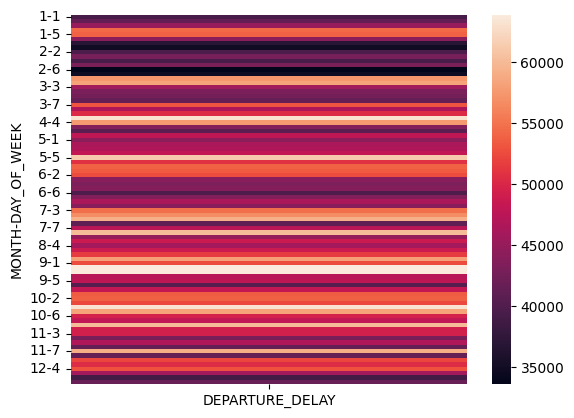

In [5]:
sbn.heatmap(data = heatmap_departure_df)

In [35]:
import numpy as np
# Create a new dataframe to filter out rows with either departure delays or arrival delays
# Create condition to when departure delay < 0 or arrival delay < 0, unit = min
filtered_df = delays_df[(delays_df['DEPARTURE_DELAY'] < 0) | (delays_df['ARRIVAL_DELAY'] < 0)]

# Drop other columns and just of month and day of week
heatmap_month_day = filtered_df.drop(['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], axis = 1)

# Retrieving count values of all day_of_week
delays = heatmap_month_day.groupby(['MONTH','DAY_OF_WEEK'])['DAY_OF_WEEK'].agg('count').to_list()

# Group by dataframe
group_by_df = heatmap_month_day.groupby(['MONTH','DAY_OF_WEEK'])['DAY_OF_WEEK'].agg('count')
print(group_by_df)

# Create new dataframe
newdf1 = pd.DataFrame(columns = sorted(heatmap_month_day['DAY_OF_WEEK'].unique()),
                      index = heatmap_month_day['MONTH'].unique())
# print(newdf1)
# Access data from df
def insert_dataframe(dataframe, insert_list): # dataframe is empty
    n = 0
    newdataframe = dataframe.copy()
    for row in range(len(dataframe)): # Iterate through number of rows
        for col in range(len(dataframe.columns)): # Iterate through number of cols
            newdataframe.at[row+1,col+1] = insert_list[n]
            n+=1
    return newdataframe

heatmap_ready_df = insert_dataframe(newdf1,delays)
heatmap_ready_df.index.name = 'Month'
print(heatmap_ready_df)
# print(type(heatmap_ready_df.columns[0]))

MONTH  DAY_OF_WEEK
1      1              39379
       2              41366
       3              45200
       4              54419
       5              53943
                      ...  
12     3              50538
       4              52933
       5              45907
       6              38991
       7              41712
Name: DAY_OF_WEEK, Length: 84, dtype: int64
           1      2      3      4      5      6      7
Month                                                 
1      39379  41366  45200  54419  53943  44257  36863
2      34925  39679  42741  39518  43172  33602  34756
3      57305  58273  45728  43021  42675  41654  53113
4      46624  50228  63168  57535  43650  40924  47851
5      44356  46428  46696  48085  61217  50809  53882
6      53406  52649  44003  43275  43760  39787  43667
7      46398  43954  54705  56746  59184  41138  47449
8      60131  44875  48750  45915  48856  51496  58059
9      52588  63921  63821  47330  47752  40400  48066
10     53509  53825  524

TypeError: Image data of dtype object cannot be converted to float

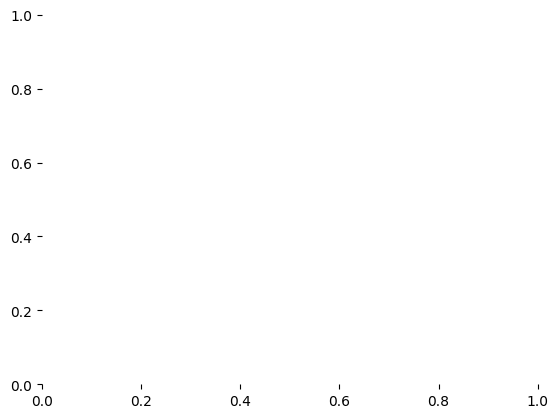

In [32]:
ax = sbn.heatmap(heatmap_ready_df, fmt = 'f')
plt.show()